In [71]:
"""
Exp05C: Risk-off gate under transaction cost

Goal:
- Test if Risk-off gate improves strategy implementability under execution frictions.


Fixed:
- Asset: SPY
- Execution: next-bar
- Signal: fixed
- Vol_targeting: Off
- Risk-off gate: On
- Regime / sample: same as Exp05A


Sweep: Transaction cost: cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005,0.01]
- realistic: 0 / 1 / 2 / 5 bps
- moderate: 10 / 20 bps
- stress: 50 / 100 bps

"""

'\nExp05C: Risk-off gate under transaction cost\n\nGoal:\n- Test if Risk-off gate improves strategy implementability under execution frictions.\n\n\nFixed:\n- Asset: SPY\n- Execution: next-bar\n- Signal: fixed\n- Vol_targeting: Off\n- Risk-off gate: On\n- Regime / sample: same as Exp05A\n\n\nSweep: Transaction cost: cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005,0.01]\n- realistic: 0 / 1 / 2 / 5 bps\n- moderate: 10 / 20 bps\n- stress: 50 / 100 bps\n\n'

In [72]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [73]:
import pandas as pd
from runner import run

In [74]:
# Sweep: transaction cost(cost_rate)
from copy import deepcopy
from config import Config
from dataclasses import replace


cfg_base = replace(Config(), 
                   RISK_MODE="none", # # Exp03A: isolate gate effect (vol_target: off)
                   MA_WINDOW=80,   # 和Exp02同
                   GATE_VOL_THRESHOLD_ANNUAL=0.15,
                   GATE_LOOKBACK=20
                  )  


cost_rate = [0.0, 0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01]
# realistic: 0 / 1 / 2 / 5 bps
# moderate: 10 / 20 bps
# stress: 50 / 100 bps


rows = []


for c in cost_rate:
    cfg_c = replace(cfg_base, COST_RATE=c)


    for use_risk_off_gate in [False, True]:
        cfg_tmp = replace(cfg_c, USE_RISK_OFF_GATE=use_risk_off_gate)
        
        _, summary = run(cfg_tmp)
        summary["COST_RATE"] = c # dict
        summary["USE_RISK_OFF_GATE"] = use_risk_off_gate # dict
        rows.append(summary)

exp05 = pd.DataFrame(rows).sort_values(["USE_RISK_OFF_GATE","COST_RATE"]) # 汇总成一个 实验结果表（experiment table）

exp05


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,COST_RATE,USE_RISK_OFF_GATE
0,0.081822,-0.169437,0.765314,108.0,2436,0.0000,False
2,0.080603,-0.171760,0.755142,108.0,2436,0.0001,False
4,0.079386,-0.174077,0.744963,108.0,2436,0.0002,False
6,0.075741,-0.180989,0.714391,108.0,2436,0.0005,False
8,0.069690,-0.192385,0.663331,108.0,2436,0.0010,False
10,0.057683,-0.214722,0.560935,108.0,2436,0.0020,False
12,0.022393,-0.284311,0.253966,108.0,2436,0.0050,False
14,-0.034047,-0.444878,-0.241740,108.0,2436,0.0100,False
1,0.073272,-0.123220,0.900186,70.0,2436,0.0000,True
3,0.072484,-0.123571,0.891281,70.0,2436,0.0001,True


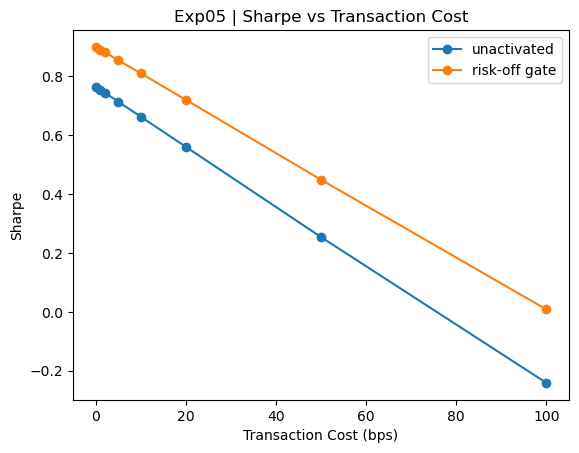

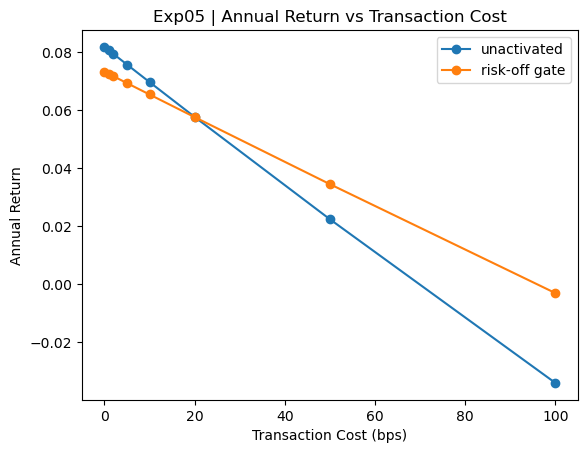

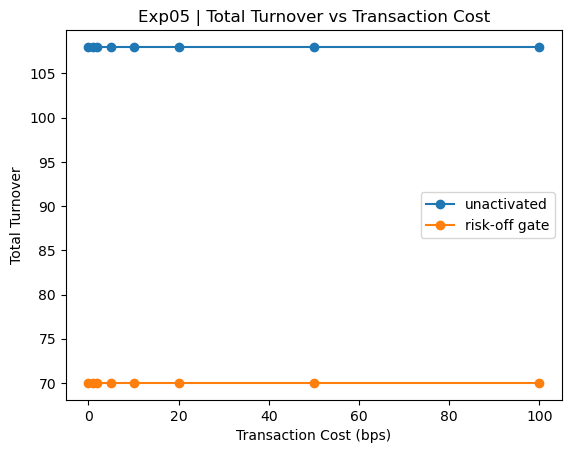

In [75]:
import matplotlib.pyplot as plt

# --- helper: make sure COST_BPS exists ---
if "COST_BPS" not in exp05.columns:
    exp05["COST_BPS"] = exp05["COST_RATE"] * 1e4

# --- split two modes ---
df_none = exp05b[exp05["USE_RISK_OFF_GATE"] == False].sort_values("COST_BPS")
df_gate   = exp05b[exp05["USE_RISK_OFF_GATE"] == True].sort_values("COST_BPS")

# 1) Sharpe vs Cost (bps)
plt.figure()
plt.plot(df_none["COST_BPS"], df_none["Sharpe"], marker="o", label="unactivated")
plt.plot(df_gate["COST_BPS"],   df_gate["Sharpe"],   marker="o", label="risk-off gate")
plt.title("Exp05 | Sharpe vs Transaction Cost")
plt.xlabel("Transaction Cost (bps)")
plt.ylabel("Sharpe")
plt.legend()
plt.show()

# 2) Annual Return vs Cost (bps)
plt.figure()
plt.plot(df_none["COST_BPS"], df_none["Annual Return"], marker="o", label="unactivated")
plt.plot(df_gate["COST_BPS"],   df_gate["Annual Return"],   marker="o", label="risk-off gate")
plt.title("Exp05 | Annual Return vs Transaction Cost")
plt.xlabel("Transaction Cost (bps)")
plt.ylabel("Annual Return")
plt.legend()
plt.show()

# 3) Total Turnover vs Cost (bps)
plt.figure()
plt.plot(df_none["COST_BPS"], df_none["Total Turnover"], marker="o", label="unactivated")
plt.plot(df_gate["COST_BPS"],   df_gate["Total Turnover"],   marker="o", label="risk-off gate")
plt.title("Exp05 | Total Turnover vs Transaction Cost")
plt.xlabel("Transaction Cost (bps)")
plt.ylabel("Total Turnover")
plt.legend()
plt.show()
